In [7]:
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For handling missing values
from sklearn.impute import SimpleImputer  # If using scikit-learn for imputation

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [9]:
df = pd.read_csv('/Users/eawe.fellow/Desktop/NYC Energy Consumption Data Sci Caostone/Data 2/processed/energy_clean.csv')

In [8]:
df.columns

Index(['borough', 'account_name', 'serial_number', 'funding_origin',
       'total_bill', 'kwh_consumption', 'kwh_bill', 'kw_consumption',
       'kw_bill', 'year_month', 'start_date', 'end_date'],
      dtype='object')

In [10]:
df.describe()

,total_bill,kwh_consumption,kwh_bill,kw_consumption,kw_bill
count,4.478410e+05,4.478410e+05,447841.000000,447841.000000,447841.000000
mean,4.277811e+03,3.115701e+04,903.345758,63.945199,903.345758
std,8.071417e+03,4.896076e+04,1567.030436,627.162212,1567.030436
min,-1.068744e+04,0.000000e+00,0.000000,0.000000,0.000000
25%,6.275600e+02,0.000000e+00,0.000000,0.000000,0.000000
50%,2.314070e+03,1.344000e+04,288.050000,23.940000,288.050000
75%,5.606160e+03,4.608000e+04,1323.170000,90.340000,1323.170000
max,3.551569e+06,1.779600e+06,137814.280000,329074.000000,137814.280000


In [11]:
df.head()

,borough,account_name,serial_number,funding_origin,total_bill,kwh_consumption,kwh_bill,kw_consumption,kw_bill,year_month,start_date,end_date
0,bronx,adams,7223256,federal,15396.82,128800.0,2808.0,216.0,2808.0,2010-01-01,2009-12-24,2010-01-26
1,bronx,adams,7223256,federal,14556.34,115200.0,2912.0,224.0,2912.0,2010-02-01,2010-01-26,2010-02-25
2,bronx,adams,7223256,federal,13904.98,103200.0,2808.0,216.0,2808.0,2010-03-01,2010-02-25,2010-03-26
3,bronx,adams,7223256,federal,14764.04,105600.0,2704.0,208.0,2704.0,2010-04-01,2010-03-26,2010-04-26
4,bronx,adams,7223256,federal,13729.54,97600.0,2808.0,216.0,2808.0,2010-05-01,2010-04-26,2010-05-24


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447841 entries, 0 to 447840
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   borough          447841 non-null  object 
 1   account_name     447841 non-null  object 
 2   serial_number    447841 non-null  object 
 3   funding_origin   447841 non-null  object 
 4   total_bill       447841 non-null  float64
 5   kwh_consumption  447841 non-null  float64
 6   kwh_bill         447841 non-null  float64
 7   kw_consumption   447841 non-null  float64
 8   kw_bill          447841 non-null  float64
 9   year_month       447841 non-null  object 
 10  start_date       447841 non-null  object 
 11  end_date         447841 non-null  object 
dtypes: float64(5), object(7)
memory usage: 41.0+ MB


In [14]:
total_bill_by_borough = df.groupby('borough')['total_bill'].sum().sort_values(ascending=False)

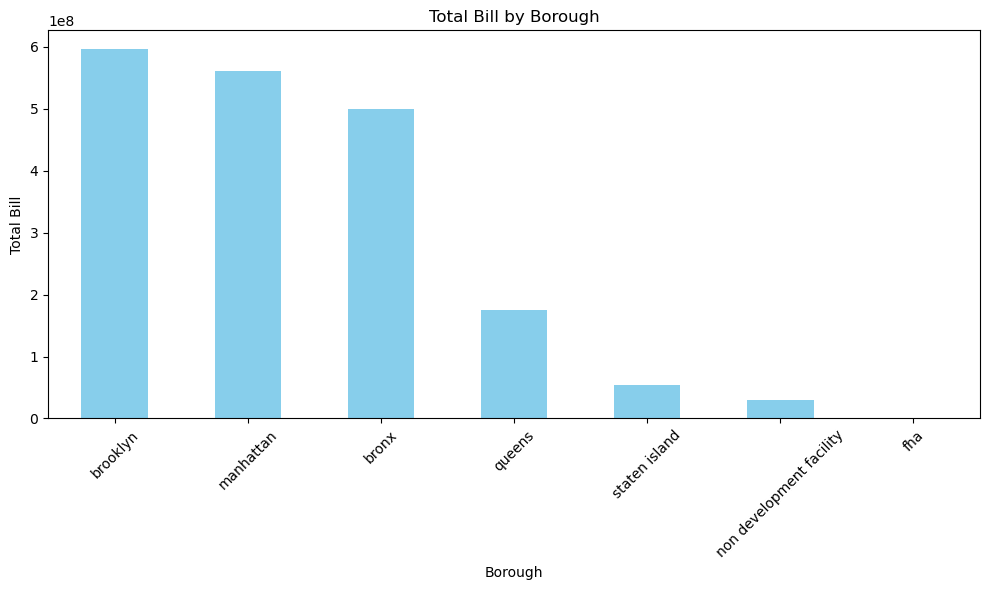

In [15]:
plt.figure(figsize=(10, 6))
total_bill_by_borough.plot(kind='bar', color='skyblue')
plt.title('Total Bill by Borough')
plt.xlabel('Borough')
plt.ylabel('Total Bill')
plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.tight_layout()
plt.show()

In [16]:
df['year'] = pd.to_datetime(df['year_month']).dt.year

In [17]:
total_bill_by_year_and_borough = df.groupby(['year', 'borough'])['total_bill'].sum()



In [22]:
# Step 3: Find the borough with the highest total bill for each year
borough_with_highest_bill_each_year = total_bill_by_year_and_borough.groupby(level='year').idxmax().values

borough_with_highest_bill_each_year

array([(2010, 'brooklyn'), (2012, 'brooklyn'), (2013, 'brooklyn'),
       (2014, 'brooklyn'), (2015, 'brooklyn'), (2016, 'brooklyn'),
       (2017, 'brooklyn'), (2019, 'brooklyn'), (2020, 'brooklyn'),
       (2021, 'brooklyn'), (2022, 'brooklyn'), (2023, 'bronx')],
      dtype=object)

In [19]:
# Step 4: Plot a bar plot
plt.figure(figsize=(10, 6))
for year, borough in zip(borough_with_highest_bill_each_year[:, 0], borough_with_highest_bill_each_year[:, 1]):
    total_bill = total_bill_by_year_and_borough.loc[year, borough]
    plt.bar(year, total_bill, label=borough)

plt.title('Borough with Highest Total Bill Each Year')
plt.xlabel('Year')
plt.ylabel('Total Bill')
plt.legend(title='Borough', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(df['year'].min(), df['year'].max() + 1))
plt.tight_layout()
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

<Figure size 1000x600 with 0 Axes>

In [23]:
avg_kwh_by_borough = df.groupby('borough')['kwh_consumption'].mean()



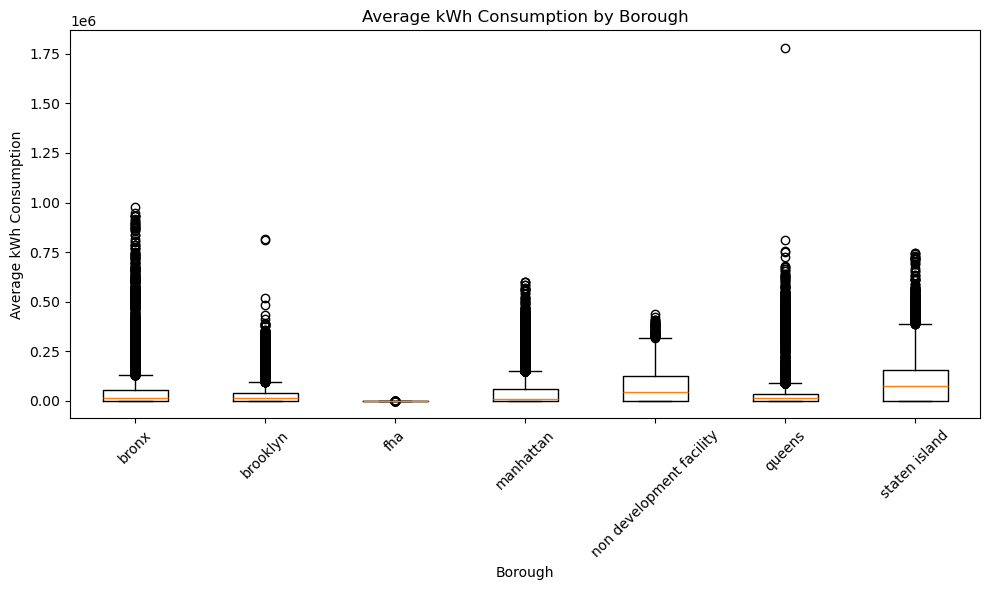

In [24]:
plt.figure(figsize=(10, 6))
plt.boxplot([df[df['borough'] == borough]['kwh_consumption'] for borough in avg_kwh_by_borough.index],
            labels=avg_kwh_by_borough.index)
plt.title('Average kWh Consumption by Borough')
plt.xlabel('Borough')
plt.ylabel('Average kWh Consumption')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:

df['year'] = pd.to_datetime(df['year_month']).dt.year



In [26]:
#Group the data by 'year', 'borough' and calculate the average kWh bill for each group
avg_kwh_bill_by_year_and_borough = df.groupby(['year', 'borough'])['kwh_bill'].mean().reset_index()



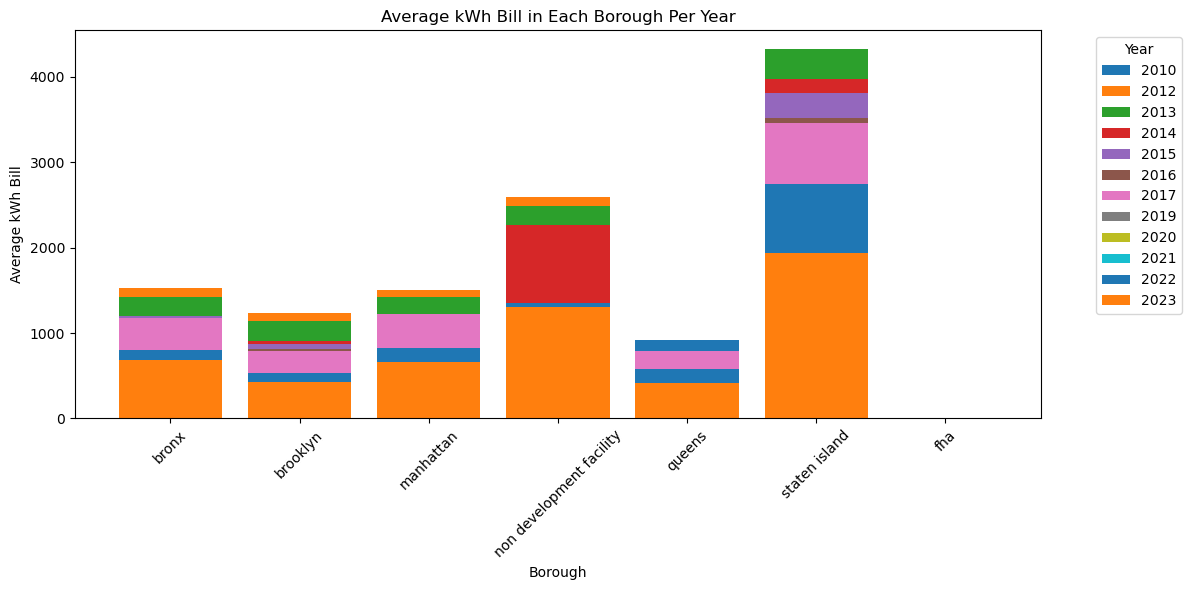

In [27]:
# Plot a bar plot for each year
plt.figure(figsize=(12, 6))
for year in avg_kwh_bill_by_year_and_borough['year'].unique():
    data_year = avg_kwh_bill_by_year_and_borough[avg_kwh_bill_by_year_and_borough['year'] == year]
    plt.bar(data_year['borough'], data_year['kwh_bill'], label=str(year))

plt.title('Average kWh Bill in Each Borough Per Year')
plt.xlabel('Borough')
plt.ylabel('Average kWh Bill')
plt.xticks(rotation=45)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [28]:
# Step 1: Extract year from the 'year_month' column
df['year'] = pd.to_datetime(df['year_month']).dt.year



In [30]:
# Step 2: Group the data by 'year', 'borough' and calculate the average total bill for each group
avg_total_bill_by_year_and_borough = df.groupby(['year', 'borough'])['total_bill'].mean().reset_index()
avg_total_bill_by_year_and_borough


,year,borough,total_bill
0,2010,bronx,6653.439541
1,2010,brooklyn,4973.487096
2,2010,manhattan,6829.490692
3,2010,non development facility,15077.499814
4,2010,queens,5679.622332
...,...,...,...
75,2023,fha,95.908000
76,2023,manhattan,4740.167080
77,2023,non development facility,9286.641034
78,2023,queens,2989.083640


In [38]:


# Step 1: Extract year from the 'year_month' column
df['year'] = pd.to_datetime(df['year_month']).dt.year



In [39]:
# Step 2: Group the data by 'year', 'borough', and calculate the average total bill for each group
avg_total_bill_by_year_and_borough = df.groupby(['year', 'borough'])['total_bill'].mean().reset_index()



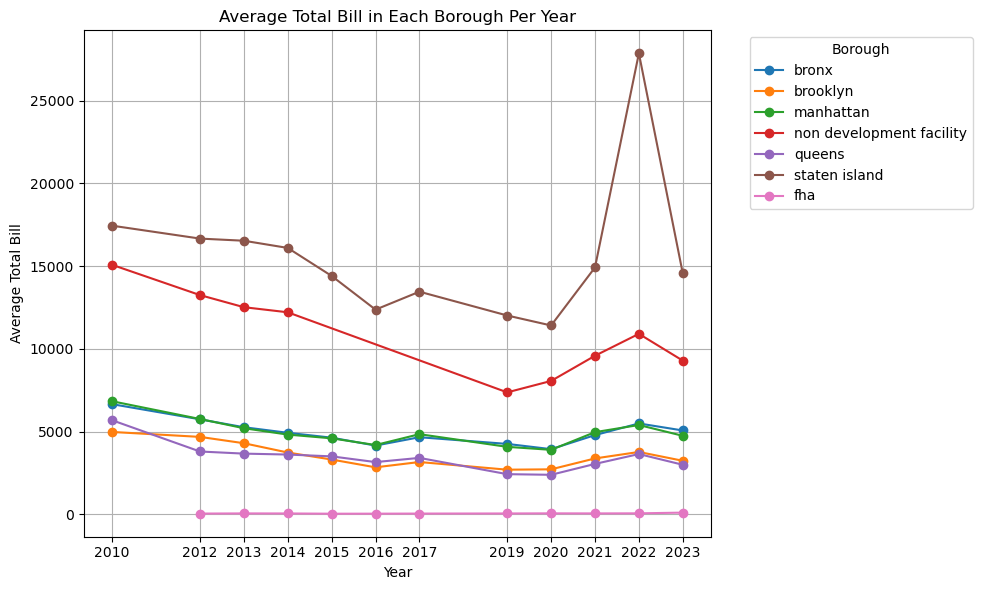

In [40]:
# Step 3: Plot a line plot for each borough
plt.figure(figsize=(10, 6))
for borough in avg_total_bill_by_year_and_borough['borough'].unique():
    data_borough = avg_total_bill_by_year_and_borough[avg_total_bill_by_year_and_borough['borough'] == borough]
    plt.plot(data_borough['year'], data_borough['total_bill'], marker='o', label=borough)

plt.title('Average Total Bill in Each Borough Per Year')
plt.xlabel('Year')
plt.ylabel('Average Total Bill')
plt.xticks(avg_total_bill_by_year_and_borough['year'].unique())
plt.legend(title='Borough', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


Ironically Staten Island has the highest yearly energy bill since 2010.

Nevertheless, from further research, out of all the boroughs, Staten Island had the highest homeownership rate at 69.8 percent. This is 4.4 percentage points higher than the national rate (65.4%), more than three times as high as the rate in the Bronx (19.6%), and over twice as high as the rates in Brooklyn (30.3%) and Manhattan (25.0%). Queens had the second-highest homeownership rate in the city at 45.6 percent.

In [42]:
total_kwh_consumption_by_year_and_borough = df.groupby(['year', 'borough'])['kwh_consumption'].sum()


In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'borough', 'kwh_consumption', and 'year_month' are columns in your DataFrame
# Replace 'df' with the name of your DataFrame

# Step 1: Extract year from the 'year_month' column
df['year'] = pd.to_datetime(df['year_month']).dt.year






In [49]:

# Step 2: Group the data by 'year' and 'borough', and calculate the total kWh consumption for each group
total_kwh_by_year_and_borough = df.groupby(['year', 'borough'])['kwh_consumption'].sum().reset_index()



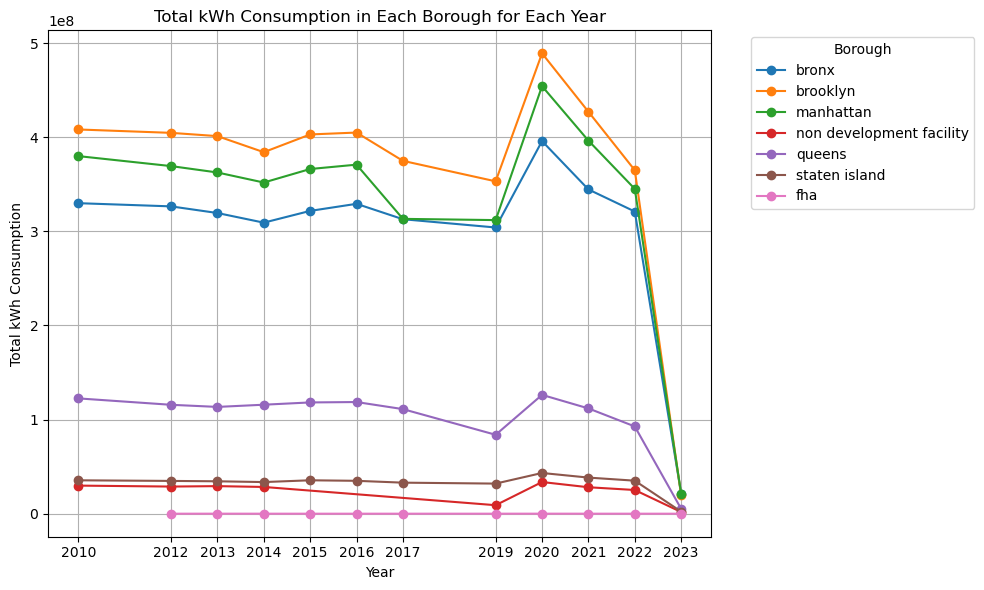

In [50]:
# Step 3: Plot a line plot for each borough
plt.figure(figsize=(10, 6))
for borough in total_kwh_by_year_and_borough['borough'].unique():
    data_borough = total_kwh_by_year_and_borough[total_kwh_by_year_and_borough['borough'] == borough]
    plt.plot(data_borough['year'], data_borough['kwh_consumption'], marker='o', label=borough)

plt.title('Total kWh Consumption in Each Borough for Each Year')
plt.xlabel('Year')
plt.ylabel('Total kWh Consumption')
plt.xticks(total_kwh_by_year_and_borough['year'].unique())
plt.legend(title='Borough', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()



Brookyln seems to have the most energy/KWh consumption every year since 2010

## What we learned from the EDA?

The most electricity is used in Brooklyn which is supported by Brooklyn being the most populated borough

The least is used in Staten Island, which makes sense due to the smaller population
The months with the most electricity consumption are July and August, followed by January
NYCHA Developments that are federally funded use the most electricity while Section 8 housing and non residential use the least
